# Non-linear Classification

We will compare last weeks linear classification  of images to non-linear, tree-based methods.


## Required packages

If you are not on Google Colab, then you might have to install `sklearn`.

From a terminal:
```
pip install -U sklearn
```
from Jupyter:
```python
!pip install -U sklearn
```

## Import the necessary packages

In [39]:
from sklearn.datasets import fetch_openml
from sklearn.svm import LinearSVC  # Linear reference classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

## Download the data
We will use the ```fetch_openml``` helper function from ```sklearn.datasets``` to download the data from [openml.org](https://www.openml.org/d/40926). The data is a small version of the CIFAR-10 dataset, called ```CIFAR_10_small```. The CIFAR-10 data set is described on [Alex Krizhevsky's homepage](https://www.cs.toronto.edu/~kriz/cifar.html)

In [7]:
data = fetch_openml(name='CIFAR_10_small')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Look at some images

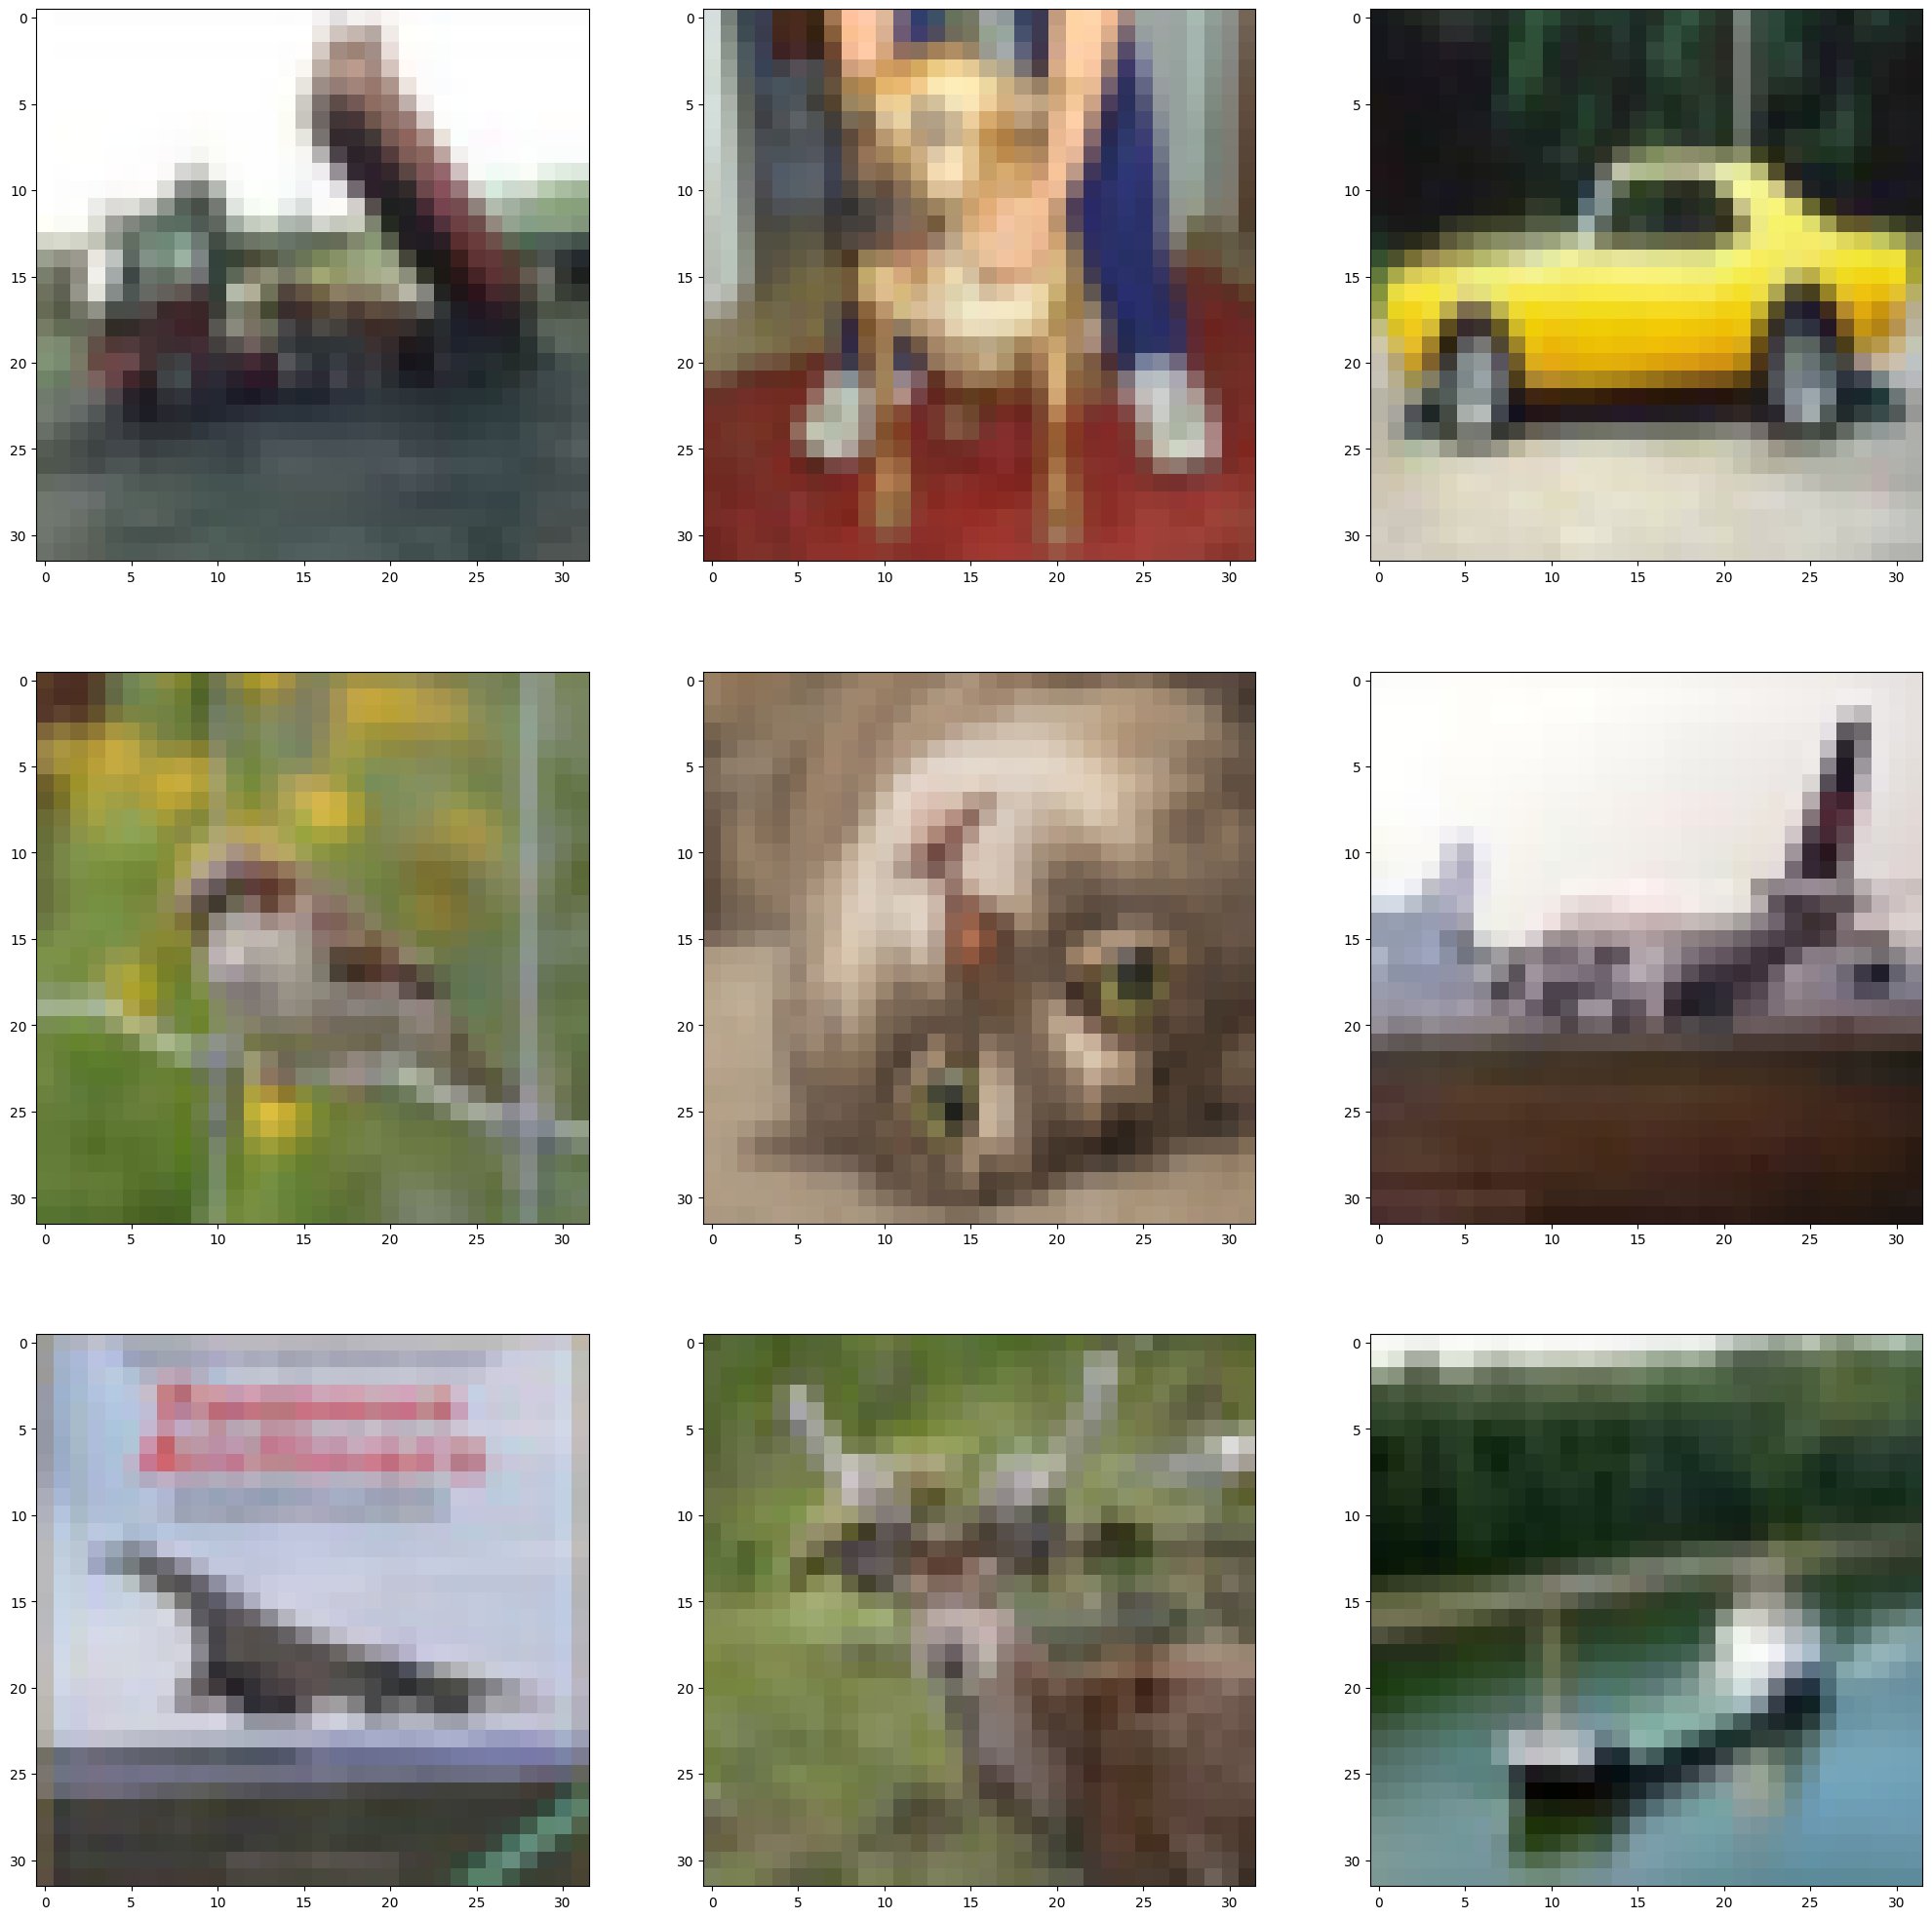

In [8]:
# Reshape and normalize 9 "random" images
im0 = data.data.loc[2].values.reshape(-1,32,32).transpose(1,2,0)/255.
im1 = data.data.loc[51].values.reshape(-1,32,32).transpose(1,2,0)/255.
im2 = data.data.loc[823].values.reshape(-1,32,32).transpose(1,2,0)/255.

im3 = data.data.loc[1024].values.reshape(-1,32,32).transpose(1,2,0)/255.
im4 = data.data.loc[2011].values.reshape(-1,32,32).transpose(1,2,0)/255.
im5 = data.data.loc[8023].values.reshape(-1,32,32).transpose(1,2,0)/255.

im6 = data.data.loc[10003].values.reshape(-1,32,32).transpose(1,2,0)/255.
im7 = data.data.loc[15004].values.reshape(-1,32,32).transpose(1,2,0)/255.
im8 = data.data.loc[19023].values.reshape(-1,32,32).transpose(1,2,0)/255.

# make a 3 x 3 figure
fig = plt.figure(figsize=(25,25))
# first image
ax = fig.add_subplot(331)
ax.imshow(im0)
# second image
ax = fig.add_subplot(332)
ax.imshow(im1)
# third image
ax = fig.add_subplot(333)
ax.imshow(im2)
# 4th image
ax = fig.add_subplot(334)
ax.imshow(im3)
# 5th image
ax = fig.add_subplot(335)
ax.imshow(im4)
# 6th image
ax = fig.add_subplot(336)
ax.imshow(im5)
# 7th image
ax = fig.add_subplot(337)
ax.imshow(im6)
# 8th image
ax = fig.add_subplot(338)
ax.imshow(im7)
# 9th image
ax = fig.add_subplot(339)
ax.imshow(im8)

## Preprocessing

Instead of all 10 classes, we want to just use the following three: airplane, automobile and deer. From ```data.DESCR``` we can see that these corresponds to the integers 0, 1 and 4.
### Normalize the data and remove all classes except three

The images are stored as ```uint8```, i.e. unsigned 8-bit integers, where the min value is 0 and max is 255.

In [9]:
y = data.target.astype(int).copy()
X = data.data / 255.
keep_ids = np.logical_or(y<2, y==4) #To choose only the 3 classes we want (0,1,4)
y = y[keep_ids]
X = X[keep_ids]

In [15]:
y.shape, X.shape

((5978,), (5978, 3072))

### Data split
We need to split the data into training and test sets. The former is used to train, or fit, the model, and the latter is used to test, or evaluate, the model.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Multi-class classification
The task is not a binary classification task, but a mulit-class since we have three and not just two classes.

![Multi-class](https://drive.google.com/uc?id=1rnyu4qrFy2BUFCq8eFVxVLwXZ9MkOXCD)

Image credit: [Alex Krizhevsky](https://cs231n.github.io/linear-classify/)
<!-- ![Network architecture](https://drive.google.com/uc?id=1-MSS49rORx9oMw4uBvbckHO1vx1fDV8i) -->


## Fit a linear model to use as a benchmark
**Q 1)** Instantiate the linear learner.

In [16]:
linear_model = LinearSVC()

**Q 2)** Fit the model on the data.

In [17]:
linear_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

**Q 3)** Evaluate the model's performance.

In [27]:
linear_predictions = linear_model.predict(X_test)
print(metrics.accuracy_score(y_test, linear_predictions))


0.6729096989966555


## Bagging classifier

**Q 4)** Use sklearn's `BaggingClassifier()` and `DecisionTreeClassifier()` to instantiate the learner.

In [18]:
bag_model = BaggingClassifier()
dt_model = DecisionTreeClassifier()

Fit the model on the data.

In [19]:
bag_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

Evaluate the model's performance.

In [31]:
bag_predict = bag_model.predict(X_test)
dt_predict = dt_model.predict(X_test)

print(metrics.accuracy_score(y_test, bag_predict))
print(metrics.accuracy_score(y_test, dt_predict))

0.725752508361204
0.640133779264214


## Random Forest classifier
Instantiate a random forest classifer using sklearn's `RandomForestClassifier()`.

In [22]:
rf_model = RandomForestClassifier()

Fit the model on the data.

In [23]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

Evaluate the model's performance.

In [30]:
rf_predict = rf_model.predict(X_test)
print(metrics.accuracy_score(y_test, rf_predict))

0.768561872909699


## Gradient Boosting classifier
Instantiate and fit a Gradient boosting classifier in a single line using sklearns `GradientBoostingClassifier`.

In [26]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [1]:
GradientBoostingClassifier().fit(X_train, y_train).predict(X_test)

NameError: name 'GradientBoostingClassifier' is not defined

Evaluate the model's performance.

In [34]:
gb_predict = gb_model.predict(X_test)

In [35]:
print(metrics.accuracy_score(y_test, gb_predict))

0.802675585284281


## A faster gradient boosting implementation

Sklearn's `HistGradientBoostingClassifier()` and `HistGradientBoostingRegressor()`, inspired by [LightGBM](https://github.com/Microsoft/LightGBM) (see [LightGBM](https://scikit-learn.org/stable/modules/ensemble.html#lightgbm)). These histogram-based estimators can be orders of magnitude faster than `GradientBoostingClassifier()` and `GradientBoostingRegressor()` when the number of samples is larger than tens of thousands of samples.

Let's try the `HistGradientBoostingClassifier`.

In [37]:
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train, y_train)
hgb_predict = hgb_model.predict(X_test)
print(metrics.accuracy_score(y_test, hgb_predict))

0.822742474916388


**Q 5)**: What is the best classifier?

**Answer**: ....

**Q 6)**: Do you expect to get at least as good result on an unseen data set?

**Answer**: ....

In [40]:
scores = cross_val_score(hgb_model, X, y, cv=5)
print("Mean Accuracy:", scores.mean())


Mean Accuracy: 0.8369046053091896
